In [286]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as leg


def gauss(x):
    return np.exp(-100*(x-.5)**2)

def legendre_polynomial(order, x):
    coef = []
    if type(x) is float:
       # print("here")
        if x<0 or x>1:
            return 0
        else:
            for n in range(0, order+1):
                if(n == order):
                    coef.append(1)
                else:
                    coef.append(0)
            return leg.Legendre(coef, domain=[0,1])(x)
    else:
        y = np.zeros(x.size)
        for i in range(x.size):
           # print(i)
            if x[i] < 0 or x[i] > 1:
                y[i] = 0
            else:
                for n in range(0, order+1):
                    if(n == order):
                        coef.append(1)
                    else:
                        coef.append(0)
               # print(coef)
                #print(x[i])
                #print(y[i])
                y[i]=leg.Legendre(coef, domain=[0,1])(x[i])
                coef.clear()
   #             print(y[i])
    return y
        
def scaling(order,scale, translation,x):
    return 2**(scale/2)*legendre_polynomial(order,2**scale*x-translation)

def scaling_coef(order,scale,translation)

def testLegendre(f,order,x):
    y = np.zeros(x.size)
   # print(y)
    for i in range(y.size):
       # print(type(x[i]))
        y[i]= f(order,float(x[i]))
    return y

In [287]:
x=np.arange(0, 1, 0.01)

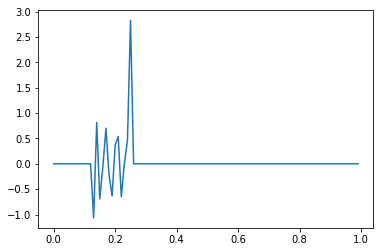

In [299]:
plt.plot(x, scaling(10,3,1,x))
plt.show()